# Fourier

## Shanon Nyquist
Sampling
https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem
You can interpolate a band limitted signal using sincs and get it back.

sha = dirac comb https://en.wikipedia.org/wiki/Dirac_comb
$ \sha_T(t) = \sum_{k=-\infty}^{\infty} \delta(t-kT) $
The $F[\sha_{T}] ~ \sha_{1/T}$ 

sampling S[f] = shaw*f. Deletes the parts of the function.


$\delta(\alpha t) = \frac{1}{|\alpha|} \delta(t)$


## Autocorrelation
https://en.wikipedia.org/wiki/Autocorrelation
cross correlation https://en.wikipedia.org/wiki/Cross-correlation sliding dot product.
https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem autocorrelction is foruier transform of power specturm because basically a convolution

dot product is a way of measuring similarity. sliding enables to see at what offset the similarity is maximum.

self convolution



fluctuation dissipation
https://www.philipzucker.com/simple-gnuradio-sonar-rangefinding/


https://en.wikipedia.org/wiki/Poisson_summation_formula



# From samples

strongly depends on how you infer your total function from the samples.
The band limitted method is to use sincs

But 

The hting I want is to be smoothish betwen

At actually, I want it to be rubber stamped like way far out. Maybe not infinity? But like, far out there.

If there are multiple reaosnble interpolations and extrapolations, do them all to get a feel to what is robust.


# Formal

Fourier transforming is largely dealt with by rules and not by going back to integral definition.

In [ ]:
prod = Function('prod', Dist, TFun, RealSort())


smul = Function('smul', RealSort(), Dist, Dist)
shift = Function("shift", Dist, RealSort(), Dist)
scale = Function("scale", Dist, RealSort(), Dist)
F = Function("Fourier", Dist, Dist)

# everything for both?
smul = Function('smul', RealSort(), TFun, TFun)

# integration by parts
f @ F(phi) == F(f) @ phi
delta = Const("delta", Dist)





https://docs.scipy.org/doc/scipy/tutorial/fft.html#fourier-transforms-scipy-fft

fftfreq



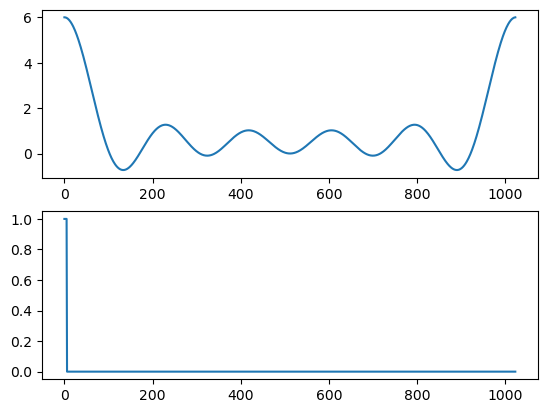

In [10]:
import numpy as np
import scipy as sp
import scipy.fft

N = 1024
f = np.zeros(N)
#f[3*N//8:5*N//8] = 1
f[0:6] = 1
F = sp.fft.fft(f)
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(np.real(F))
plt.subplot(2,1,2)
plt.plot(f)

## chubfun

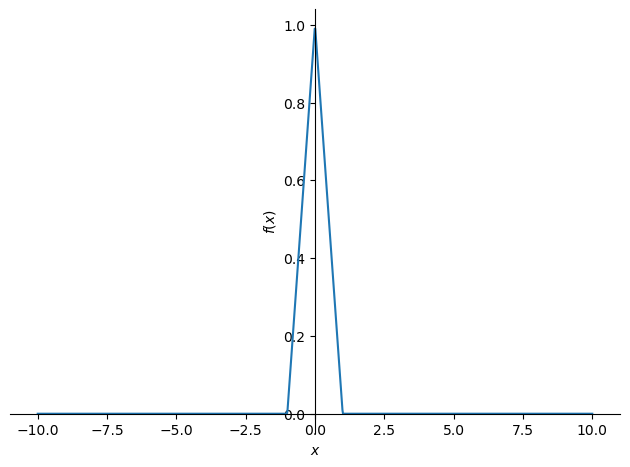

Piecewise((0, x <= -1), (x + 1, (x <= 0) & (x > -1)), (1 - x, (x <= 1) & (x > 0)), (0, x > 1))

In [43]:
from sympy import *

x = symbols("x")
def spike(a,b,c):
    x = symbols("x")
    return piecewise_exclusive(Piecewise((0, x <= a), 
                     ((x - a) / (b - a), (a < x) & (x <= b)), 
                      ((x - c) / (b - c), (b < x) & (x <= c)), 
                      (0, c < x)))
plot(spike(-1,0,1))
spike(-1,0,1)

In [44]:
spike(0,2,4)

Piecewise((0, x <= 0), (x/2, (x <= 2) & (x > 0)), (2 - x/2, (x <= 4) & (x > 2)), (0, x > 4))

In [57]:
def basis(pts):
    return [spike(pts[i], pts[i+1], pts[i+2]) for i in range(len(pts)-2)]
def myinterg(f, pts):
    pts = [-oo] + list(pts) + [oo]
    return sum([Integral(f, (x, pts[i], pts[i+1])).doit() for i in range(len(pts) - 1)])
bs = basis(range(5))
#[[Integral(a2*a1, (x, -oo, oo)).doit() for a2 in bs] for a1 in bs]
t00 = (bs[0]*bs[0])
Integral(t00, (x,-oo,oo)).doit()
t01 = (bs[0]*bs[1])
Integral(t01, (x,-oo,oo)).doit()
t02 = (bs[0]*bs[2])
#Integral(t02, (x,-10,10)).doit()
#myinterg(t02, range(5))
#t02.expand()
piecewise_fold(t02)
#bs[0], bs[2]


Piecewise((0, ((x <= 0) | (x <= 1)) & ((x <= 0) | (x <= 2)) & ((x <= 0) | (x <= 1) | (x <= 2)) & ((x <= 0) | (x <= 1) | (x <= 3)) & ((x <= 0) | (x <= 1) | (x <= 4)) & ((x <= 0) | (x <= 2) | (x <= 3)) & ((x <= 0) | (x <= 2) | (x <= 4)) & ((x <= 0) | (x <= 1) | (x <= 2) | (x <= 3)) & ((x <= 0) | (x <= 1) | (x <= 2) | (x <= 4)) & ((x <= 0) | (x <= 1) | (x <= 3) | (x <= 4)) & ((x <= 0) | (x <= 2) | (x <= 3) | (x <= 4)) & ((x <= 0) | (x <= 1) | (x <= 2) | (x <= 3) | (x <= 4))), (x*(x - 2), (x <= 1) & (x <= 3)), (x*(4 - x), (x <= 1) & (x <= 4)), (0, True))

In [ ]:
bs = [chebyshevt(n,x) for n in range(4)]
dotprod = [[Integral(a1*a2 / sqrt(1 - x**2), (x,-1,1)).doit() for a1 in bs] for a2 in bs]

class DictFun():
    v : dict[object, object]
    def __add__(self,  other):
        return DictFun({k: self.v.get(k, 0) + other.v.get(k, 0) for k in set(self.v.keys()) | set(other.v.keys())})
    def __matmul__()



class VecSpace():
    coeffs : np.array
    fs :  list[sympy.Expr]
    dom : sympy.Relation


    def __add__(self,other):
        assert self.fs == other.fs and self.dom == other.dom
        return VecSpace(self.coeffs + other.coeffs, self.fs, self.dom)
    
    def mergeadd(self, other):
        assert self.dom == other.dom
        pass
        # combine and dedup the two f lists also

    def build_dot(self):
        self.dot = np.array([[Integral(a1*a2, self.dom).doit() for a1 in self.fs] for a2 in self.fs])
    

class VecSpace():
    fs : list[sympy.Expr]
    dom : sympy.Relation
    def __init__(self, fs, dom):
        self.fs = fs
        self.dom = dom
        self.dot = np.array([[Integral(a1*a2, self.dom).doit() for a1 in self.fs] for a2 in self.fs])

class Vec():
    coeffs: np.array
    space : VecSpace
    
class LinOp():
    coeffs : np.array
    dom : VecSpace
    cod : VecSpace





{1: 1, x: 1, 2*x**2 - 1: 1, 4*x**3 - 3*x: 1}

In [ ]:
class SampFun():
    offset = 0
    dt = 1
    tails = sympy.Expr # approximation of tails. Monomial?

    samples = []
    def shift(self, t):
        self.offset += t
    def scale(self, s):
        self.dt *= s
    def smul(self, s):
    def __call__(self, x):
        np.interp(x,samples)

class PeriodicFun():
    period = 1
    samples = []

class Chebfun

In [ ]:
class PolyFun():
    coeffs
    domain
class ChebFun():
    coeffs
    domain # shift?

# what is the point of moving stuff out of the sympy layer?


# why not do lambdas. Because lambdas can't be peaked at under the hood (easily)
class Shift():
    """ Generic Shift."""
    def __init__(self, f, a):
        self.f = f
        self.a = a
    def __call__(self, x):
        return self.f(x - self.a)
    def scale(self, s):
        self.a *= s
    def diff(self, x):
        return Shift(self.f.diff(x), a)

class

class SumFunc():
    funcs = [] # They indivusally know their domains?
    def __call__(self):

# FFT



# Laplace
https://mpmath.org/doc/current/calculus/inverselaplace.html numerical inverse lalpace transform
Talbot stehfast, de hoog, cohen

Bromwich contour

Difference between laplace and fourier transform. Nate was asking.

Laplace is used in initial value problem ocntexts. It seems more careful about initial conditions.
Transfer functions. Causality.

No physical interpretation into sums of sines.
Maybe could think of decaying physical processes and how one might

Inverting laplace is more bizarre because it doesn't even see x < 0. Some kind of continuation process


# Lie Groups
Numerical lie groups.
Grids don't have rotational symmettry
They can have translation symmettry if you loop them.
But also compressive trnasformations, which aren't invertible still kind of work (minus like a low rank component we lose?)

Can we take a computational group theory lens on this? Permutations of grid points
The action of permutations on the grid



The Peter Weyl Theorem.
https://en.wikipedia.org/wiki/Peter%E2%80%93Weyl_theorem
Topological groups
https://www.math.columbia.edu/~woit/RepThy/repthynotes3.pdf
https://terrytao.wordpress.com/2011/01/23/the-peter-weyl-theorem-and-non-abelian-fourier-analysis-on-compact-groups/
Lie groups.
generalization of characters from finite to infinite groups.
Fourier on non abliean space was relevant in quantum computing?


Lie groups

The matrix exponential is a cool idea

What else is interesting here?
Rotation is interesting. Affine, linear transformations. Conformal maps are interesting
The whole definition is that lie groups are differentiable. That does probably add a lot of rigidity
Of course rotations are differentiable as functions of their coordinates. Its a bunch of cosine and sine entries
Time evolution in quantum mechanics is a rotation. That’s schrodinger’s equation.
I feel like you want some math thing
Lots of physical systems have rotational invariance. That factors some part of their dynamics to be very constrained
And in quantum mechanics the properties of representatiosn of rotations force certain things to be possible /not
https://en.m.wikipedia.org/wiki/Wigner–Eckart_theorem

Its a variation of the method of separation of variables to solve a spheically symmetric pde
Its a central dogma of physics that symmetry are connected to invariants (noether’s theorem, which is more important as a vibe than anything i think)
So mathematics of rotation leads to properties of angular momentum. Particles have spins, light carries some spin, this restricts what transitions atoms can take
At a more abstract level, gauge invariance is a basically non intuitive symmetry that is required of the description of fields for some reason
Electromagnetism is best described by a vector potential who’s derivatives matter, but who’s value does not
Generalize this a couple times and you end up at the standard model
And the eightfold way
But the standard model is just a pile of mud
And reveals very little about our lives
Atoms reveal more
At least like they’re involved in colors and chemistry and stuff
The vector potential is a highly mysterious bit unavoidable entity. I don’t know why
There is some evidence that it is physical in a sense
https://en.m.wikipedia.org/wiki/Aharonov–Bohm_effect

https://en.m.wikipedia.org/wiki/Gimbal_lock

Oh yeah this was some wacky shit https://en.m.wikipedia.org/wiki/Spin–statistics_theorem

scattering



### Lie algerba method
https://www.philipzucker.com/fiddling-around-with-validated-ode-integration-sum-of-squares-taylor-models/ 

https://www.researchgate.net/publication/233653257_Solving_Differential_Equations_by_Symmetry_Groups sympy links this paper. Sympy has some lie algebra stuff in there

https://www-users.math.umn.edu/~olver/sm.html Peter Olver tutorial

http://www-users.math.umn.edu/~olver/talk.html olver talks

https://www-sop.inria.fr/members/Evelyne.Hubert/publications/PDF/Hubert_HDR.pdf

https://www.cs.cmu.edu/~aplatzer/logic/diffinv.html andre platzer. Zach says Darboux polynomials?

https://sylph.io/blog/math.html

Books: Birhoff and Rota, Guggenheimer, different Olver books, prwctical guide to invaraints https://www.amazon.com/Practical-Invariant-Monographs-Computational-Mathematics/dp/0521857015

# Numeric Exact Fourier

The fourier transform of a box is a sinc function.


This is also true in 2d or 3d.

Also a linear spike is integrable

We also have the shift theorem that `F[f(x-a)] = e^ika F[f(x)]`

Obviously any function that is a finite sum of shifted boxes can be decomposed precisely

There is an approximation by boxes or ramps also. There is a residual

F[f] = F[approx + (f - approx)] = F[approx] + F[f - approx]

F[f] - F[approx] = F[f - approx]
|F[f] - F[approx] |max = F[f - apprxo] <= int |err exp | = int |err|

f = \sum f_n box(x - na)
\sum_n e^ikna * sinc(k) = (sum f_n e^ikna) * sinc(k)
This is the fft of f_n kind of.
f_n w^n
w = e^ika
ka = m / N a fraction





In [10]:
from sympy import *
x,k = symbols("x k", real = True)
s = integrate(exp(I*k *x), (x,-1,1))
integrate(exp(-I*x*k)*s, (k, -oo, oo)) # hmm. Can't do it?



Integral(Piecewise(((-I*exp(I*k)/k + I*exp(-I*k)/k)*exp(-I*k*x), Ne(k, 0)), (2*exp(-I*k*x), True)), (k, -oo, oo))

# Legendre Steepest Descent

A white whale.

Legendre is steepest descent of Fourier transformation



stroargtz
https://www.youtube.com/playlist?list=PL5EH0ZJ7V0jV7kMYvPcZ7F9oaf_YAlfbI
https://arxiv.org/abs/hep-th/9505166  A Geometrical Formulation of the Renormalization Group Method for Global Analysis

https://claude.ai/chat/ae8868f3-fadc-4c33-a754-0119f25ab275

I'll note that the legendre transform of a quadratic curve is another quadratic curve of inverse curvature.
Lgenedre transforms are

This is the analog of

The thing that is hard is not gaussian vs non gaussian integrals. Its convex vs non convex probably. But I don't see people mention that noonconvex statistcal mechanics or quantum field theory are tractable (basically because despite being nonlinear, they are well treated semi classically). Maybe they aren't

Linear programming. If we had an integral over a polytope with a exponential of a linear function, we could find it's classical point via linear programming

Quadratic programming - We can integrate a guassian over a polytope by finding it's critical points.

SDP - semidefinite programming... Hmmm. A polytope integral over a matrix variable where they are constrained to be positive semidefinite. $\int_{AX \ge 0, X >= 0}$. Maybe you could do something funky with that. 


In [ ]:
import sympy as sp

def legendre_transform_symbolic(f, x, p):
    # Define the Legendre transform
    L = p * x - f
    
    # Find the stationary point
    stationary = sp.solve(sp.diff(L, x), x)
    
    # Substitute the stationary point back into L
    if len(stationary) > 0:
        L_transformed = L.subs(x, stationary[0])
        return sp.simplify(L_transformed)
    else:
        return "No stationary point found"

# Example usage
x, p = sp.symbols('x p')
f = x**2  # Example function

result = legendre_transform_symbolic(f, x, p)
print(f"Legendre transform of {f} is: {result}")

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

def legendre_transform_numerical(f, x_range, p):
    def negative_legendre(x):
        return -(p * x - f(x))
    
    result = minimize_scalar(negative_legendre, bounds=x_range, method='bounded')
    
    if result.success:
        x_star = result.x
        return p * x_star - f(x_star)
    else:
        return None

# Example usage
def f(x):
    return x**2

x_range = (-10, 10)
p_values = np.linspace(-5, 5, 100)

transformed_values = [legendre_transform_numerical(f, x_range, p) for p in p_values]

# You can plot the results using matplotlib if desired